# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 46kB/s  eta 0:00:01    71% |███████████████████████         | 10.5MB 27.3MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

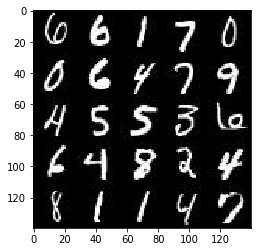

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

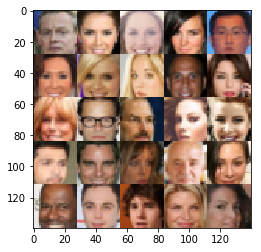

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels),name='input_real')
    input_z = tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator',reuse=reuse):
        # input size: 28*28*3
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1 = tf.maximum(alpha*x1,x1)
        # 14*14*64
        
        x2 = tf.layers.conv2d(x1,128,5,strides=2,padding='same')
        bn2 = tf.layers.batch_normalization(x2,training=True)
        relu2 = tf.maximum(alpha*bn2,bn2)
        # 7*7*128
        
        x3 = tf.layers.conv2d(x1,256,5,strides=2,padding='same')
        bn3 = tf.layers.batch_normalization(x3,training=True)
        relu3 = tf.maximum(alpha*bn3,bn3)
        # 4*4*256
        
        flat = tf.reshape(relu3,(-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [38]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator',reuse=not is_train):
        # FCL
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = tf.maximum(alpha*x1,x1)
        # 7x7x512
        
        x2 = tf.layers.conv2d_transpose(x1,256,5,strides=1,padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(x2*alpha,x2)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf.maximum(x3*alpha,x3)
        # 14x14x128
        
        x4 = tf.layers.conv2d_transpose(x3,64,5,strides=2,padding='same')
        x4 = tf.layers.batch_normalization(x4,training=is_train)
        x4 = tf.maximum(x4*alpha,x4)
        # 28x28x64
        
        logits= tf.layers.conv2d_transpose(x4,out_channel_dim,5,strides=1,padding='same')
        # 28x28x3
        
        output = tf.tanh(logits)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim)
    d_model_real,d_logits_real = discriminator(input_real)
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real+d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    in_real, in_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(in_real, in_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, l_rate, beta1)
    
    steps = 0
    print_param = 10  #  to print the losses
    show_param = 100  # to show generator ouputs
    n_images = 15  # for the show_generator_output()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                _ = sess.run(g_opt,feed_dict={in_real:batch_images,in_z:batch_z,l_rate:learning_rate})
                _ = sess.run(d_opt,feed_dict={in_real:batch_images,in_z:batch_z,l_rate:learning_rate})
                
                if steps % print_param == 0:
                    train_loss_d = d_loss.eval({in_real:batch_images,in_z:batch_z})
                    train_loss_g = g_loss.eval({in_z:batch_z})
                    
                    print("Epoch {}".format(epoch_i),
                         "Discriminator loss: {:.4f}".format(train_loss_d),
                         "Generator loss: {:.4f}".format(train_loss_g))
                
                if steps % show_param == 0:
                    show_generator_output(sess, n_images, in_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0 Discriminator loss: 0.6376 Generator loss: 1.5242
Epoch 0 Discriminator loss: 0.5407 Generator loss: 2.3877
Epoch 0 Discriminator loss: 0.9314 Generator loss: 3.0495
Epoch 0 Discriminator loss: 0.3610 Generator loss: 2.2130
Epoch 0 Discriminator loss: 0.4374 Generator loss: 2.9230
Epoch 0 Discriminator loss: 0.4152 Generator loss: 2.3000
Epoch 0 Discriminator loss: 0.6977 Generator loss: 1.8470
Epoch 0 Discriminator loss: 0.7390 Generator loss: 0.8600
Epoch 0 Discriminator loss: 0.6090 Generator loss: 1.4430
Epoch 0 Discriminator loss: 0.5248 Generator loss: 1.2132


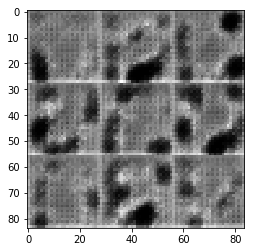

Epoch 0 Discriminator loss: 0.4763 Generator loss: 2.9206
Epoch 0 Discriminator loss: 0.5941 Generator loss: 1.6259
Epoch 0 Discriminator loss: 0.8662 Generator loss: 0.8695
Epoch 0 Discriminator loss: 0.7862 Generator loss: 2.7365
Epoch 0 Discriminator loss: 1.2996 Generator loss: 1.6278
Epoch 0 Discriminator loss: 0.9669 Generator loss: 1.3434
Epoch 0 Discriminator loss: 1.1163 Generator loss: 1.0133
Epoch 0 Discriminator loss: 1.0163 Generator loss: 1.4969
Epoch 0 Discriminator loss: 1.0833 Generator loss: 1.2056
Epoch 0 Discriminator loss: 1.1808 Generator loss: 1.4961


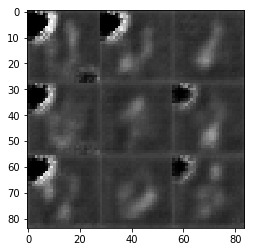

Epoch 0 Discriminator loss: 1.1886 Generator loss: 1.0259
Epoch 0 Discriminator loss: 0.9922 Generator loss: 1.0161
Epoch 0 Discriminator loss: 1.0185 Generator loss: 1.0422
Epoch 0 Discriminator loss: 1.0580 Generator loss: 1.1081
Epoch 0 Discriminator loss: 0.9288 Generator loss: 0.7860
Epoch 0 Discriminator loss: 1.1341 Generator loss: 1.1017
Epoch 0 Discriminator loss: 1.0773 Generator loss: 0.7781
Epoch 0 Discriminator loss: 1.0752 Generator loss: 0.7369
Epoch 0 Discriminator loss: 1.1165 Generator loss: 0.9925
Epoch 0 Discriminator loss: 1.0741 Generator loss: 1.2303


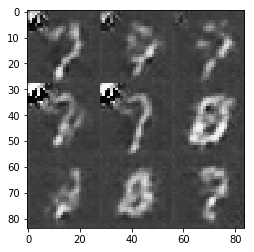

Epoch 0 Discriminator loss: 0.9896 Generator loss: 1.0574
Epoch 0 Discriminator loss: 0.9777 Generator loss: 1.0586
Epoch 0 Discriminator loss: 1.0145 Generator loss: 0.9803
Epoch 0 Discriminator loss: 0.9668 Generator loss: 0.7392
Epoch 0 Discriminator loss: 1.0871 Generator loss: 0.6122
Epoch 0 Discriminator loss: 0.9101 Generator loss: 1.0987
Epoch 0 Discriminator loss: 1.3543 Generator loss: 1.1069
Epoch 0 Discriminator loss: 1.0316 Generator loss: 1.4791
Epoch 0 Discriminator loss: 1.0093 Generator loss: 1.0651
Epoch 0 Discriminator loss: 1.0518 Generator loss: 0.6437


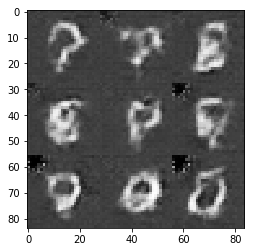

Epoch 0 Discriminator loss: 0.9504 Generator loss: 1.0489
Epoch 0 Discriminator loss: 1.1126 Generator loss: 1.0743
Epoch 0 Discriminator loss: 1.1566 Generator loss: 1.3257
Epoch 0 Discriminator loss: 1.0993 Generator loss: 1.0388
Epoch 0 Discriminator loss: 1.2747 Generator loss: 0.9670
Epoch 0 Discriminator loss: 1.0533 Generator loss: 0.9539
Epoch 0 Discriminator loss: 1.1625 Generator loss: 0.4875
Epoch 0 Discriminator loss: 1.1116 Generator loss: 0.7171
Epoch 0 Discriminator loss: 1.0941 Generator loss: 1.0407
Epoch 0 Discriminator loss: 1.2619 Generator loss: 1.2241


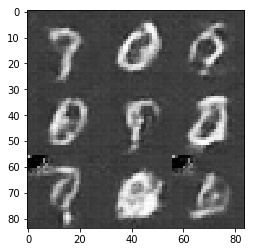

Epoch 0 Discriminator loss: 1.0640 Generator loss: 1.2536
Epoch 0 Discriminator loss: 1.3425 Generator loss: 0.5896
Epoch 0 Discriminator loss: 1.0651 Generator loss: 0.7261
Epoch 0 Discriminator loss: 1.1051 Generator loss: 1.2386
Epoch 0 Discriminator loss: 1.0522 Generator loss: 1.4737
Epoch 0 Discriminator loss: 1.3604 Generator loss: 1.5782
Epoch 0 Discriminator loss: 1.0982 Generator loss: 1.2450
Epoch 0 Discriminator loss: 1.1016 Generator loss: 1.3796
Epoch 0 Discriminator loss: 1.2844 Generator loss: 1.6109
Epoch 0 Discriminator loss: 0.8248 Generator loss: 1.2507


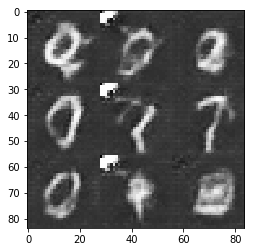

Epoch 0 Discriminator loss: 1.1161 Generator loss: 0.8109
Epoch 0 Discriminator loss: 1.1167 Generator loss: 0.6875
Epoch 0 Discriminator loss: 1.0048 Generator loss: 0.9255
Epoch 0 Discriminator loss: 1.0660 Generator loss: 1.0057
Epoch 0 Discriminator loss: 1.2138 Generator loss: 0.5334
Epoch 0 Discriminator loss: 0.9531 Generator loss: 0.9795
Epoch 0 Discriminator loss: 1.1027 Generator loss: 0.8743
Epoch 0 Discriminator loss: 1.0510 Generator loss: 1.1320
Epoch 0 Discriminator loss: 1.0371 Generator loss: 1.0036
Epoch 0 Discriminator loss: 1.2636 Generator loss: 1.5685


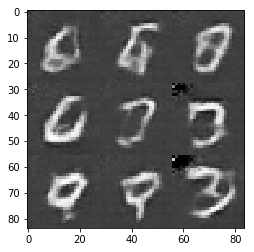

Epoch 0 Discriminator loss: 1.4811 Generator loss: 1.9061
Epoch 0 Discriminator loss: 1.3707 Generator loss: 1.4545
Epoch 0 Discriminator loss: 1.1042 Generator loss: 1.0002
Epoch 0 Discriminator loss: 1.0445 Generator loss: 1.2029
Epoch 0 Discriminator loss: 1.1149 Generator loss: 1.1403
Epoch 0 Discriminator loss: 1.0253 Generator loss: 1.0659
Epoch 0 Discriminator loss: 1.2354 Generator loss: 1.2077
Epoch 0 Discriminator loss: 1.1513 Generator loss: 1.2575
Epoch 0 Discriminator loss: 1.0951 Generator loss: 1.0921
Epoch 0 Discriminator loss: 1.1152 Generator loss: 1.1216


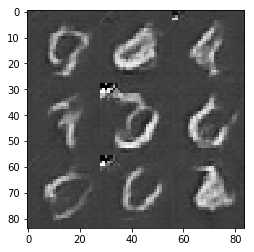

Epoch 0 Discriminator loss: 1.0582 Generator loss: 0.9442
Epoch 0 Discriminator loss: 1.0734 Generator loss: 0.7478
Epoch 0 Discriminator loss: 1.2167 Generator loss: 0.8410
Epoch 0 Discriminator loss: 1.4681 Generator loss: 0.3386
Epoch 0 Discriminator loss: 1.1628 Generator loss: 0.5875
Epoch 0 Discriminator loss: 1.1480 Generator loss: 0.8915
Epoch 0 Discriminator loss: 1.1359 Generator loss: 0.9302
Epoch 0 Discriminator loss: 0.9894 Generator loss: 1.0056
Epoch 0 Discriminator loss: 1.1940 Generator loss: 0.6511
Epoch 0 Discriminator loss: 1.1451 Generator loss: 1.0624


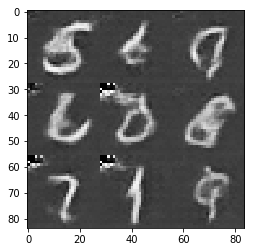

Epoch 0 Discriminator loss: 1.1959 Generator loss: 0.9446
Epoch 0 Discriminator loss: 1.1165 Generator loss: 0.7616
Epoch 0 Discriminator loss: 1.0529 Generator loss: 0.9251
Epoch 0 Discriminator loss: 1.1714 Generator loss: 0.8001
Epoch 0 Discriminator loss: 1.0380 Generator loss: 0.8999
Epoch 0 Discriminator loss: 1.1204 Generator loss: 0.9338
Epoch 0 Discriminator loss: 1.1862 Generator loss: 1.1018
Epoch 0 Discriminator loss: 0.9888 Generator loss: 1.0010
Epoch 0 Discriminator loss: 1.2046 Generator loss: 1.3167
Epoch 0 Discriminator loss: 1.7445 Generator loss: 2.2288


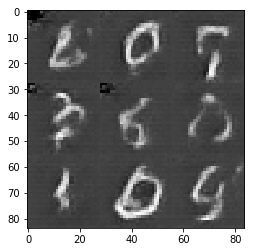

Epoch 0 Discriminator loss: 1.1767 Generator loss: 1.1017
Epoch 0 Discriminator loss: 1.0719 Generator loss: 0.9278
Epoch 0 Discriminator loss: 1.1225 Generator loss: 0.9290
Epoch 0 Discriminator loss: 1.0183 Generator loss: 0.9339
Epoch 0 Discriminator loss: 1.2454 Generator loss: 1.4284
Epoch 0 Discriminator loss: 1.3317 Generator loss: 1.7134
Epoch 0 Discriminator loss: 1.2953 Generator loss: 1.7984
Epoch 0 Discriminator loss: 1.0849 Generator loss: 0.8752
Epoch 0 Discriminator loss: 1.1933 Generator loss: 1.1239
Epoch 0 Discriminator loss: 1.2824 Generator loss: 1.3665


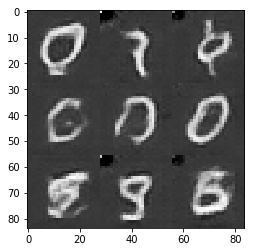

Epoch 0 Discriminator loss: 0.9528 Generator loss: 1.2018
Epoch 0 Discriminator loss: 1.1947 Generator loss: 1.0365
Epoch 0 Discriminator loss: 1.0095 Generator loss: 1.0555
Epoch 0 Discriminator loss: 1.0238 Generator loss: 0.8895
Epoch 0 Discriminator loss: 1.2349 Generator loss: 0.4813
Epoch 0 Discriminator loss: 1.0846 Generator loss: 0.8032
Epoch 0 Discriminator loss: 1.2012 Generator loss: 0.9219
Epoch 0 Discriminator loss: 1.1384 Generator loss: 0.9284
Epoch 0 Discriminator loss: 1.1347 Generator loss: 1.0071
Epoch 0 Discriminator loss: 1.1015 Generator loss: 0.8963


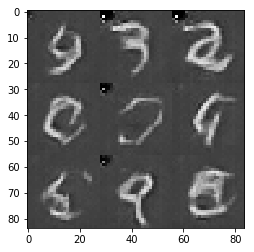

Epoch 0 Discriminator loss: 1.1506 Generator loss: 1.0891
Epoch 0 Discriminator loss: 1.1443 Generator loss: 0.7274
Epoch 0 Discriminator loss: 1.1430 Generator loss: 0.5833
Epoch 0 Discriminator loss: 1.2437 Generator loss: 1.1129
Epoch 0 Discriminator loss: 1.1913 Generator loss: 0.9876
Epoch 0 Discriminator loss: 1.0085 Generator loss: 0.9291
Epoch 0 Discriminator loss: 0.9944 Generator loss: 0.9610
Epoch 0 Discriminator loss: 1.3824 Generator loss: 0.6648
Epoch 0 Discriminator loss: 0.9722 Generator loss: 1.1096
Epoch 0 Discriminator loss: 1.0411 Generator loss: 1.4961


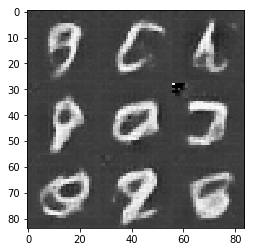

Epoch 0 Discriminator loss: 1.3273 Generator loss: 1.6261
Epoch 0 Discriminator loss: 1.1308 Generator loss: 1.2299
Epoch 0 Discriminator loss: 1.1896 Generator loss: 1.5017
Epoch 0 Discriminator loss: 1.0848 Generator loss: 1.2568
Epoch 0 Discriminator loss: 1.0606 Generator loss: 1.0220
Epoch 0 Discriminator loss: 1.0197 Generator loss: 0.9239
Epoch 0 Discriminator loss: 1.1336 Generator loss: 0.6209
Epoch 0 Discriminator loss: 0.9922 Generator loss: 0.9161
Epoch 0 Discriminator loss: 1.0565 Generator loss: 0.8038
Epoch 0 Discriminator loss: 1.2150 Generator loss: 0.6889


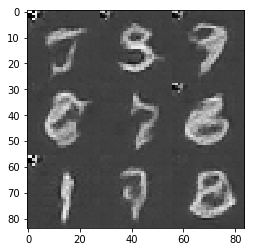

Epoch 0 Discriminator loss: 1.0498 Generator loss: 0.8008
Epoch 0 Discriminator loss: 1.0242 Generator loss: 0.8409
Epoch 0 Discriminator loss: 0.9726 Generator loss: 0.9657
Epoch 0 Discriminator loss: 1.1370 Generator loss: 1.1645
Epoch 0 Discriminator loss: 1.1124 Generator loss: 0.8623
Epoch 0 Discriminator loss: 1.1877 Generator loss: 0.5788
Epoch 0 Discriminator loss: 1.2622 Generator loss: 0.5155
Epoch 0 Discriminator loss: 1.1655 Generator loss: 0.5448
Epoch 0 Discriminator loss: 0.9746 Generator loss: 0.9862
Epoch 0 Discriminator loss: 1.1520 Generator loss: 1.2667


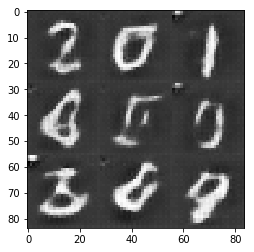

Epoch 0 Discriminator loss: 1.1184 Generator loss: 0.6759
Epoch 0 Discriminator loss: 1.1753 Generator loss: 0.8001
Epoch 0 Discriminator loss: 1.0815 Generator loss: 1.5241
Epoch 0 Discriminator loss: 1.3174 Generator loss: 1.7027
Epoch 0 Discriminator loss: 1.0937 Generator loss: 0.9995
Epoch 0 Discriminator loss: 1.1057 Generator loss: 0.9058
Epoch 0 Discriminator loss: 1.1248 Generator loss: 0.8827
Epoch 0 Discriminator loss: 1.1194 Generator loss: 1.2426
Epoch 0 Discriminator loss: 1.3110 Generator loss: 1.6503
Epoch 0 Discriminator loss: 0.9933 Generator loss: 1.0520


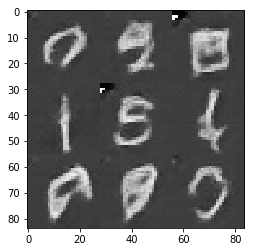

Epoch 0 Discriminator loss: 1.0624 Generator loss: 1.0630
Epoch 0 Discriminator loss: 1.1989 Generator loss: 1.3702
Epoch 0 Discriminator loss: 0.9257 Generator loss: 1.5526
Epoch 0 Discriminator loss: 1.3331 Generator loss: 1.5522
Epoch 0 Discriminator loss: 1.0481 Generator loss: 1.0634
Epoch 0 Discriminator loss: 0.9383 Generator loss: 0.9892
Epoch 0 Discriminator loss: 1.1553 Generator loss: 1.0750
Epoch 0 Discriminator loss: 1.1229 Generator loss: 1.0630
Epoch 0 Discriminator loss: 1.0367 Generator loss: 1.1423
Epoch 0 Discriminator loss: 1.1564 Generator loss: 1.3317


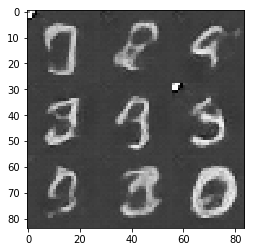

Epoch 0 Discriminator loss: 1.3460 Generator loss: 1.8402
Epoch 0 Discriminator loss: 1.2366 Generator loss: 1.5652
Epoch 0 Discriminator loss: 1.2767 Generator loss: 1.4799
Epoch 0 Discriminator loss: 1.1263 Generator loss: 1.0240
Epoch 0 Discriminator loss: 1.1887 Generator loss: 0.8441
Epoch 0 Discriminator loss: 1.1861 Generator loss: 0.8629
Epoch 0 Discriminator loss: 0.9332 Generator loss: 0.8944
Epoch 0 Discriminator loss: 1.1984 Generator loss: 0.8204
Epoch 0 Discriminator loss: 0.9133 Generator loss: 1.1389
Epoch 0 Discriminator loss: 1.1027 Generator loss: 0.8512


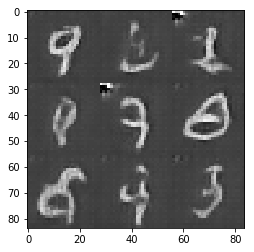

Epoch 0 Discriminator loss: 1.1896 Generator loss: 0.9892
Epoch 0 Discriminator loss: 1.1568 Generator loss: 0.5708
Epoch 0 Discriminator loss: 1.0720 Generator loss: 0.7507
Epoch 0 Discriminator loss: 1.4733 Generator loss: 1.4801
Epoch 0 Discriminator loss: 1.3305 Generator loss: 1.3664
Epoch 0 Discriminator loss: 0.9539 Generator loss: 0.8798
Epoch 0 Discriminator loss: 1.1567 Generator loss: 1.3250
Epoch 1 Discriminator loss: 1.0117 Generator loss: 1.1780
Epoch 1 Discriminator loss: 1.3509 Generator loss: 0.5792
Epoch 1 Discriminator loss: 1.2649 Generator loss: 0.5022


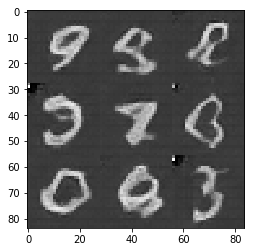

Epoch 1 Discriminator loss: 1.1814 Generator loss: 0.7638
Epoch 1 Discriminator loss: 1.0182 Generator loss: 0.8678
Epoch 1 Discriminator loss: 1.3794 Generator loss: 0.6459
Epoch 1 Discriminator loss: 0.9514 Generator loss: 1.1586
Epoch 1 Discriminator loss: 1.1532 Generator loss: 1.5214
Epoch 1 Discriminator loss: 1.1043 Generator loss: 1.3585
Epoch 1 Discriminator loss: 1.1351 Generator loss: 1.3967
Epoch 1 Discriminator loss: 1.1806 Generator loss: 1.3291
Epoch 1 Discriminator loss: 1.0454 Generator loss: 1.1697
Epoch 1 Discriminator loss: 0.9538 Generator loss: 0.7282


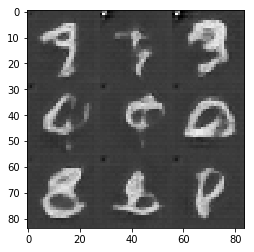

Epoch 1 Discriminator loss: 1.2970 Generator loss: 0.8293
Epoch 1 Discriminator loss: 1.2194 Generator loss: 0.8862
Epoch 1 Discriminator loss: 1.1391 Generator loss: 1.1265
Epoch 1 Discriminator loss: 1.0811 Generator loss: 0.6491
Epoch 1 Discriminator loss: 1.0648 Generator loss: 0.8303
Epoch 1 Discriminator loss: 1.0060 Generator loss: 0.7839
Epoch 1 Discriminator loss: 0.6345 Generator loss: 1.4655
Epoch 1 Discriminator loss: 1.1923 Generator loss: 1.9857
Epoch 1 Discriminator loss: 1.2276 Generator loss: 1.6943
Epoch 1 Discriminator loss: 1.7493 Generator loss: 1.6462


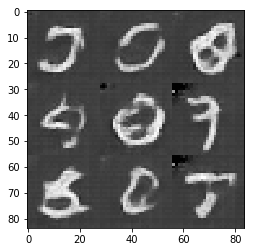

Epoch 1 Discriminator loss: 0.9200 Generator loss: 1.7571
Epoch 1 Discriminator loss: 1.2729 Generator loss: 1.6876
Epoch 1 Discriminator loss: 1.5050 Generator loss: 1.4197
Epoch 1 Discriminator loss: 1.1144 Generator loss: 1.6130
Epoch 1 Discriminator loss: 1.1860 Generator loss: 1.4972
Epoch 1 Discriminator loss: 1.2104 Generator loss: 1.7406
Epoch 1 Discriminator loss: 1.2767 Generator loss: 1.9495
Epoch 1 Discriminator loss: 1.2241 Generator loss: 1.2022
Epoch 1 Discriminator loss: 0.9951 Generator loss: 1.2123
Epoch 1 Discriminator loss: 1.1583 Generator loss: 1.7332


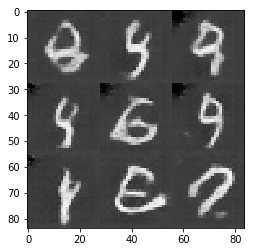

Epoch 1 Discriminator loss: 1.3983 Generator loss: 1.9241
Epoch 1 Discriminator loss: 1.2144 Generator loss: 1.2239
Epoch 1 Discriminator loss: 1.1558 Generator loss: 1.4263
Epoch 1 Discriminator loss: 1.1070 Generator loss: 0.5866
Epoch 1 Discriminator loss: 1.1669 Generator loss: 1.4269
Epoch 1 Discriminator loss: 0.9851 Generator loss: 0.7814
Epoch 1 Discriminator loss: 1.0235 Generator loss: 0.7118
Epoch 1 Discriminator loss: 1.2110 Generator loss: 0.8101
Epoch 1 Discriminator loss: 1.1410 Generator loss: 1.2498
Epoch 1 Discriminator loss: 1.3070 Generator loss: 1.3230


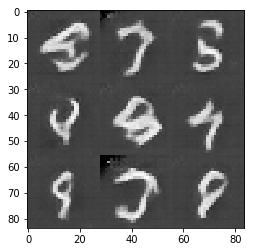

Epoch 1 Discriminator loss: 1.7937 Generator loss: 1.4893
Epoch 1 Discriminator loss: 1.3073 Generator loss: 1.1326
Epoch 1 Discriminator loss: 0.7272 Generator loss: 1.4762
Epoch 1 Discriminator loss: 0.8940 Generator loss: 0.9610
Epoch 1 Discriminator loss: 1.0191 Generator loss: 0.8750
Epoch 1 Discriminator loss: 1.0654 Generator loss: 1.0928
Epoch 1 Discriminator loss: 1.0007 Generator loss: 1.6809
Epoch 1 Discriminator loss: 1.3217 Generator loss: 1.8369
Epoch 1 Discriminator loss: 0.7626 Generator loss: 1.5866
Epoch 1 Discriminator loss: 1.2653 Generator loss: 0.6553


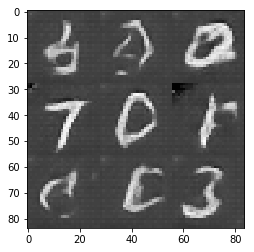

Epoch 1 Discriminator loss: 1.1848 Generator loss: 1.7359
Epoch 1 Discriminator loss: 1.1016 Generator loss: 1.0261
Epoch 1 Discriminator loss: 1.0566 Generator loss: 0.6262
Epoch 1 Discriminator loss: 1.0484 Generator loss: 0.9613
Epoch 1 Discriminator loss: 1.1915 Generator loss: 1.4070
Epoch 1 Discriminator loss: 0.8899 Generator loss: 1.0640
Epoch 1 Discriminator loss: 0.9310 Generator loss: 0.9284
Epoch 1 Discriminator loss: 0.8464 Generator loss: 0.8349
Epoch 1 Discriminator loss: 1.1281 Generator loss: 1.4362
Epoch 1 Discriminator loss: 0.7590 Generator loss: 1.1944


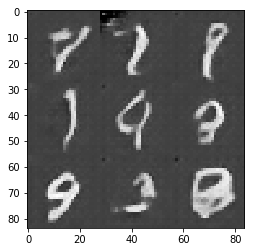

Epoch 1 Discriminator loss: 0.8529 Generator loss: 1.3673
Epoch 1 Discriminator loss: 1.2027 Generator loss: 0.9563
Epoch 1 Discriminator loss: 1.0865 Generator loss: 0.7054
Epoch 1 Discriminator loss: 0.9127 Generator loss: 1.4110
Epoch 1 Discriminator loss: 1.2812 Generator loss: 1.4774
Epoch 1 Discriminator loss: 1.2679 Generator loss: 0.5550
Epoch 1 Discriminator loss: 1.3074 Generator loss: 0.7556
Epoch 1 Discriminator loss: 0.8847 Generator loss: 1.5172
Epoch 1 Discriminator loss: 0.8426 Generator loss: 1.2398
Epoch 1 Discriminator loss: 1.2136 Generator loss: 1.2796


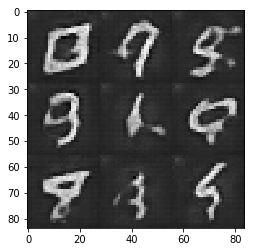

Epoch 1 Discriminator loss: 1.1798 Generator loss: 0.8249
Epoch 1 Discriminator loss: 0.8829 Generator loss: 1.0906
Epoch 1 Discriminator loss: 1.2641 Generator loss: 1.1092
Epoch 1 Discriminator loss: 1.3205 Generator loss: 1.4483
Epoch 1 Discriminator loss: 1.0585 Generator loss: 0.8628
Epoch 1 Discriminator loss: 1.2455 Generator loss: 0.9169
Epoch 1 Discriminator loss: 1.2469 Generator loss: 0.8457
Epoch 1 Discriminator loss: 1.1410 Generator loss: 1.9773
Epoch 1 Discriminator loss: 0.9319 Generator loss: 1.7433
Epoch 1 Discriminator loss: 1.2843 Generator loss: 0.9119


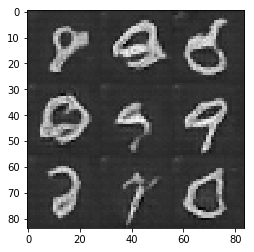

Epoch 1 Discriminator loss: 1.3128 Generator loss: 1.1829
Epoch 1 Discriminator loss: 1.2166 Generator loss: 1.6289
Epoch 1 Discriminator loss: 0.9756 Generator loss: 1.5868
Epoch 1 Discriminator loss: 1.3065 Generator loss: 1.5015
Epoch 1 Discriminator loss: 1.0231 Generator loss: 1.9621
Epoch 1 Discriminator loss: 1.1028 Generator loss: 1.1054
Epoch 1 Discriminator loss: 0.9685 Generator loss: 1.4564
Epoch 1 Discriminator loss: 1.4614 Generator loss: 2.0115
Epoch 1 Discriminator loss: 0.9309 Generator loss: 1.1858
Epoch 1 Discriminator loss: 0.8063 Generator loss: 1.2357


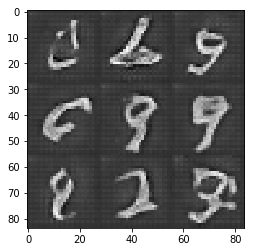

Epoch 1 Discriminator loss: 1.2285 Generator loss: 1.6810
Epoch 1 Discriminator loss: 1.0651 Generator loss: 1.2353
Epoch 1 Discriminator loss: 1.5051 Generator loss: 1.7407
Epoch 1 Discriminator loss: 1.4171 Generator loss: 1.8955
Epoch 1 Discriminator loss: 0.9936 Generator loss: 0.9490
Epoch 1 Discriminator loss: 1.1925 Generator loss: 1.4383
Epoch 1 Discriminator loss: 1.0956 Generator loss: 1.4121
Epoch 1 Discriminator loss: 0.8675 Generator loss: 1.2270
Epoch 1 Discriminator loss: 1.2138 Generator loss: 0.9736
Epoch 1 Discriminator loss: 1.0767 Generator loss: 1.1545


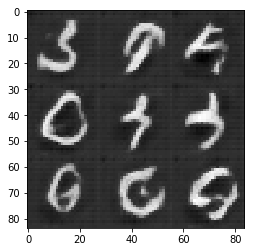

Epoch 1 Discriminator loss: 1.0818 Generator loss: 1.2413
Epoch 1 Discriminator loss: 1.1479 Generator loss: 1.4817
Epoch 1 Discriminator loss: 1.2553 Generator loss: 1.1759
Epoch 1 Discriminator loss: 1.0931 Generator loss: 0.9676
Epoch 1 Discriminator loss: 1.1417 Generator loss: 0.8257
Epoch 1 Discriminator loss: 1.0533 Generator loss: 1.0848
Epoch 1 Discriminator loss: 1.1825 Generator loss: 1.5177
Epoch 1 Discriminator loss: 0.9732 Generator loss: 0.9200
Epoch 1 Discriminator loss: 0.9778 Generator loss: 0.9317
Epoch 1 Discriminator loss: 0.8113 Generator loss: 0.8615


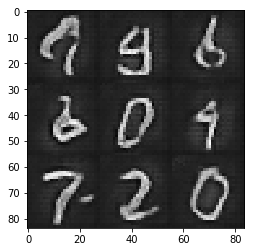

Epoch 1 Discriminator loss: 1.0531 Generator loss: 1.0535
Epoch 1 Discriminator loss: 1.1273 Generator loss: 1.1997
Epoch 1 Discriminator loss: 1.1070 Generator loss: 1.2977
Epoch 1 Discriminator loss: 1.0841 Generator loss: 1.1819
Epoch 1 Discriminator loss: 1.2684 Generator loss: 1.2395
Epoch 1 Discriminator loss: 1.0015 Generator loss: 0.8926
Epoch 1 Discriminator loss: 1.1707 Generator loss: 0.9555
Epoch 1 Discriminator loss: 1.0398 Generator loss: 0.8556
Epoch 1 Discriminator loss: 1.0726 Generator loss: 1.2732
Epoch 1 Discriminator loss: 1.3336 Generator loss: 1.2997


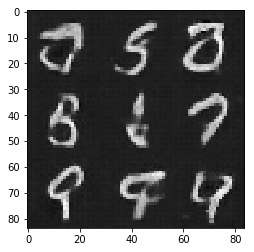

Epoch 1 Discriminator loss: 1.1708 Generator loss: 0.9538
Epoch 1 Discriminator loss: 1.1782 Generator loss: 0.9451
Epoch 1 Discriminator loss: 1.1732 Generator loss: 1.0660
Epoch 1 Discriminator loss: 1.1120 Generator loss: 0.9650
Epoch 1 Discriminator loss: 0.8859 Generator loss: 1.3240
Epoch 1 Discriminator loss: 1.0190 Generator loss: 1.3434
Epoch 1 Discriminator loss: 1.0352 Generator loss: 1.0583
Epoch 1 Discriminator loss: 1.2062 Generator loss: 1.1035
Epoch 1 Discriminator loss: 1.0886 Generator loss: 1.3772
Epoch 1 Discriminator loss: 1.0308 Generator loss: 0.8304


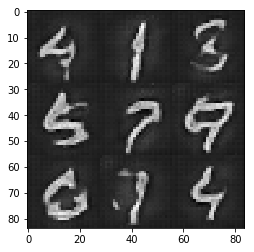

Epoch 1 Discriminator loss: 1.0307 Generator loss: 1.3637
Epoch 1 Discriminator loss: 1.1973 Generator loss: 1.5179
Epoch 1 Discriminator loss: 0.9842 Generator loss: 1.2324
Epoch 1 Discriminator loss: 1.0389 Generator loss: 1.0558
Epoch 1 Discriminator loss: 1.0848 Generator loss: 0.8959
Epoch 1 Discriminator loss: 0.9015 Generator loss: 0.7653
Epoch 1 Discriminator loss: 1.1286 Generator loss: 0.9999
Epoch 1 Discriminator loss: 0.8492 Generator loss: 1.1526
Epoch 1 Discriminator loss: 1.0481 Generator loss: 1.1178
Epoch 1 Discriminator loss: 0.9884 Generator loss: 1.3934


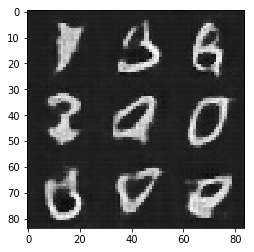

Epoch 1 Discriminator loss: 0.8373 Generator loss: 0.8961
Epoch 1 Discriminator loss: 1.2459 Generator loss: 1.1012
Epoch 1 Discriminator loss: 0.9754 Generator loss: 0.7712
Epoch 1 Discriminator loss: 0.8045 Generator loss: 0.9146
Epoch 1 Discriminator loss: 0.8608 Generator loss: 1.3693
Epoch 1 Discriminator loss: 0.8232 Generator loss: 1.3261
Epoch 1 Discriminator loss: 0.7888 Generator loss: 1.0229
Epoch 1 Discriminator loss: 0.8410 Generator loss: 1.5355
Epoch 1 Discriminator loss: 0.8468 Generator loss: 1.0953
Epoch 1 Discriminator loss: 0.8327 Generator loss: 1.3424


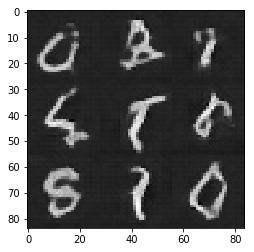

Epoch 1 Discriminator loss: 0.6766 Generator loss: 1.0653
Epoch 1 Discriminator loss: 1.0327 Generator loss: 1.6068
Epoch 1 Discriminator loss: 1.2700 Generator loss: 1.3842
Epoch 1 Discriminator loss: 1.2286 Generator loss: 1.5201
Epoch 1 Discriminator loss: 0.9252 Generator loss: 1.5493
Epoch 1 Discriminator loss: 0.6306 Generator loss: 1.3323
Epoch 1 Discriminator loss: 1.0448 Generator loss: 0.7081
Epoch 1 Discriminator loss: 0.6769 Generator loss: 1.0563
Epoch 1 Discriminator loss: 1.1545 Generator loss: 0.5857
Epoch 1 Discriminator loss: 0.9927 Generator loss: 1.4502


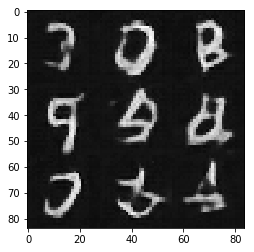

Epoch 1 Discriminator loss: 0.7712 Generator loss: 1.2495
Epoch 1 Discriminator loss: 1.2777 Generator loss: 0.6790
Epoch 1 Discriminator loss: 1.2179 Generator loss: 1.5636
Epoch 1 Discriminator loss: 1.2022 Generator loss: 0.9718
Epoch 1 Discriminator loss: 1.0055 Generator loss: 1.7363
Epoch 1 Discriminator loss: 0.7652 Generator loss: 1.1507
Epoch 1 Discriminator loss: 0.6889 Generator loss: 1.3970
Epoch 1 Discriminator loss: 1.2868 Generator loss: 1.6777
Epoch 1 Discriminator loss: 0.8511 Generator loss: 0.8212
Epoch 1 Discriminator loss: 1.1306 Generator loss: 0.9329


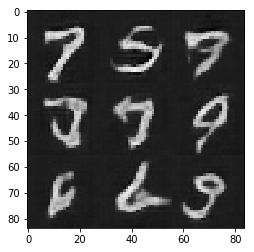

Epoch 1 Discriminator loss: 0.7847 Generator loss: 1.2850
Epoch 1 Discriminator loss: 0.8901 Generator loss: 0.8487
Epoch 1 Discriminator loss: 0.7090 Generator loss: 1.4677
Epoch 1 Discriminator loss: 0.9820 Generator loss: 1.2933
Epoch 1 Discriminator loss: 0.8297 Generator loss: 1.5517
Epoch 1 Discriminator loss: 0.7835 Generator loss: 1.4520
Epoch 1 Discriminator loss: 1.1949 Generator loss: 1.5562
Epoch 1 Discriminator loss: 1.0710 Generator loss: 1.9251
Epoch 1 Discriminator loss: 0.9370 Generator loss: 1.7233
Epoch 1 Discriminator loss: 1.4100 Generator loss: 1.3240


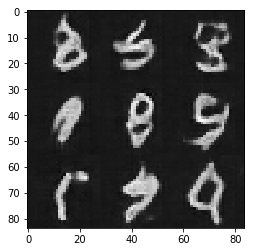

Epoch 1 Discriminator loss: 1.2605 Generator loss: 1.3406
Epoch 1 Discriminator loss: 0.7109 Generator loss: 1.6461
Epoch 1 Discriminator loss: 0.7882 Generator loss: 1.0146
Epoch 1 Discriminator loss: 0.9517 Generator loss: 1.3241
Epoch 1 Discriminator loss: 0.6918 Generator loss: 1.3377


In [30]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0 Discriminator loss: 1.1638 Generator loss: 1.3458
Epoch 0 Discriminator loss: 1.0404 Generator loss: 1.8646
Epoch 0 Discriminator loss: 0.6259 Generator loss: 1.6697
Epoch 0 Discriminator loss: 0.4546 Generator loss: 1.9784
Epoch 0 Discriminator loss: 0.3999 Generator loss: 2.1379
Epoch 0 Discriminator loss: 0.4543 Generator loss: 2.0809
Epoch 0 Discriminator loss: 0.7533 Generator loss: 2.0293
Epoch 0 Discriminator loss: 0.7319 Generator loss: 1.4621
Epoch 0 Discriminator loss: 0.6559 Generator loss: 1.5544
Epoch 0 Discriminator loss: 0.8019 Generator loss: 1.3979


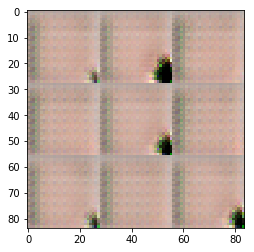

Epoch 0 Discriminator loss: 0.7962 Generator loss: 1.4194
Epoch 0 Discriminator loss: 1.1691 Generator loss: 2.2583
Epoch 0 Discriminator loss: 1.5176 Generator loss: 2.3831
Epoch 0 Discriminator loss: 0.6909 Generator loss: 1.4690
Epoch 0 Discriminator loss: 0.8725 Generator loss: 1.3726
Epoch 0 Discriminator loss: 0.8763 Generator loss: 1.5014
Epoch 0 Discriminator loss: 1.2687 Generator loss: 2.4188
Epoch 0 Discriminator loss: 0.7339 Generator loss: 1.9478
Epoch 0 Discriminator loss: 0.7396 Generator loss: 1.3384
Epoch 0 Discriminator loss: 0.9938 Generator loss: 1.5832


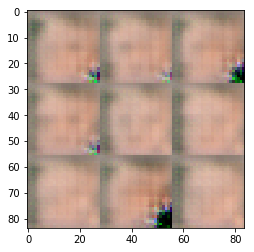

Epoch 0 Discriminator loss: 0.7059 Generator loss: 1.3902
Epoch 0 Discriminator loss: 0.7647 Generator loss: 1.4676
Epoch 0 Discriminator loss: 0.7463 Generator loss: 1.4975
Epoch 0 Discriminator loss: 0.8483 Generator loss: 1.5284
Epoch 0 Discriminator loss: 0.7800 Generator loss: 1.4639
Epoch 0 Discriminator loss: 0.8892 Generator loss: 1.4726
Epoch 0 Discriminator loss: 0.8448 Generator loss: 0.9197
Epoch 0 Discriminator loss: 0.8495 Generator loss: 1.7237
Epoch 0 Discriminator loss: 1.1199 Generator loss: 2.2807
Epoch 0 Discriminator loss: 1.0403 Generator loss: 1.8966


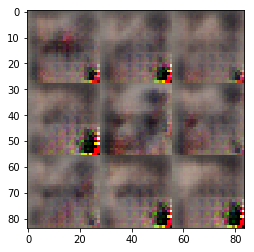

Epoch 0 Discriminator loss: 1.1501 Generator loss: 2.2547
Epoch 0 Discriminator loss: 0.8526 Generator loss: 1.3214
Epoch 0 Discriminator loss: 0.8630 Generator loss: 1.2031
Epoch 0 Discriminator loss: 0.8376 Generator loss: 1.2946
Epoch 0 Discriminator loss: 0.8948 Generator loss: 1.1714
Epoch 0 Discriminator loss: 0.8992 Generator loss: 1.2336
Epoch 0 Discriminator loss: 0.9518 Generator loss: 1.1369
Epoch 0 Discriminator loss: 0.9045 Generator loss: 1.1944
Epoch 0 Discriminator loss: 0.9406 Generator loss: 1.0731
Epoch 0 Discriminator loss: 0.9412 Generator loss: 1.0953


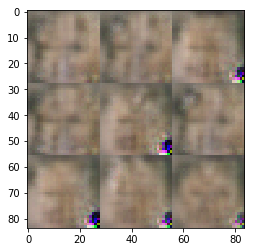

Epoch 0 Discriminator loss: 0.8700 Generator loss: 1.3198
Epoch 0 Discriminator loss: 0.9243 Generator loss: 1.1978
Epoch 0 Discriminator loss: 0.9523 Generator loss: 1.1769
Epoch 0 Discriminator loss: 0.9782 Generator loss: 1.1505
Epoch 0 Discriminator loss: 0.7681 Generator loss: 1.3405
Epoch 0 Discriminator loss: 0.9116 Generator loss: 1.1806
Epoch 0 Discriminator loss: 0.9504 Generator loss: 1.0140
Epoch 0 Discriminator loss: 0.8571 Generator loss: 1.4106
Epoch 0 Discriminator loss: 0.9658 Generator loss: 1.3139
Epoch 0 Discriminator loss: 0.9132 Generator loss: 1.5195


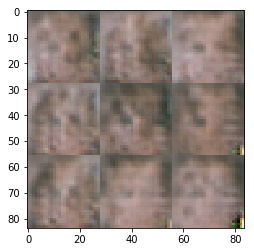

Epoch 0 Discriminator loss: 0.9545 Generator loss: 1.3781
Epoch 0 Discriminator loss: 1.0119 Generator loss: 1.3116
Epoch 0 Discriminator loss: 1.0193 Generator loss: 1.1533
Epoch 0 Discriminator loss: 1.0125 Generator loss: 1.0460
Epoch 0 Discriminator loss: 1.0489 Generator loss: 1.2136
Epoch 0 Discriminator loss: 1.5413 Generator loss: 1.1961
Epoch 0 Discriminator loss: 0.9644 Generator loss: 1.1183
Epoch 0 Discriminator loss: 0.9594 Generator loss: 1.2674
Epoch 0 Discriminator loss: 0.9392 Generator loss: 1.2367
Epoch 0 Discriminator loss: 0.9463 Generator loss: 1.0158


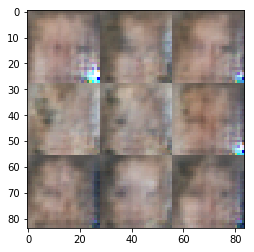

Epoch 0 Discriminator loss: 1.0226 Generator loss: 0.9695
Epoch 0 Discriminator loss: 1.0513 Generator loss: 1.0226
Epoch 0 Discriminator loss: 1.0864 Generator loss: 1.0577
Epoch 0 Discriminator loss: 1.0594 Generator loss: 1.1133
Epoch 0 Discriminator loss: 1.0902 Generator loss: 0.8794
Epoch 0 Discriminator loss: 0.9740 Generator loss: 1.3904
Epoch 0 Discriminator loss: 1.0372 Generator loss: 1.1366
Epoch 0 Discriminator loss: 0.9928 Generator loss: 1.2571
Epoch 0 Discriminator loss: 1.0883 Generator loss: 1.1316
Epoch 0 Discriminator loss: 1.2291 Generator loss: 1.3715


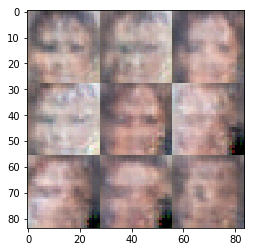

Epoch 0 Discriminator loss: 1.1064 Generator loss: 1.0550
Epoch 0 Discriminator loss: 1.0834 Generator loss: 1.0756
Epoch 0 Discriminator loss: 0.9756 Generator loss: 0.9910
Epoch 0 Discriminator loss: 1.0133 Generator loss: 1.0268
Epoch 0 Discriminator loss: 1.0997 Generator loss: 1.0513
Epoch 0 Discriminator loss: 1.1288 Generator loss: 0.9966
Epoch 0 Discriminator loss: 1.1677 Generator loss: 1.2013
Epoch 0 Discriminator loss: 1.1088 Generator loss: 1.0684
Epoch 0 Discriminator loss: 1.1851 Generator loss: 0.9897
Epoch 0 Discriminator loss: 1.0623 Generator loss: 0.9939


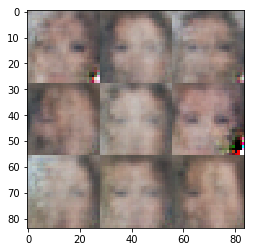

Epoch 0 Discriminator loss: 1.0531 Generator loss: 1.0874
Epoch 0 Discriminator loss: 1.0567 Generator loss: 1.2068
Epoch 0 Discriminator loss: 1.1600 Generator loss: 1.0379
Epoch 0 Discriminator loss: 1.1077 Generator loss: 0.8886
Epoch 0 Discriminator loss: 1.0549 Generator loss: 1.0243
Epoch 0 Discriminator loss: 1.1690 Generator loss: 1.1472
Epoch 0 Discriminator loss: 1.0610 Generator loss: 1.3283
Epoch 0 Discriminator loss: 2.0321 Generator loss: 1.2377
Epoch 0 Discriminator loss: 1.6609 Generator loss: 1.2020
Epoch 0 Discriminator loss: 1.0603 Generator loss: 1.0455


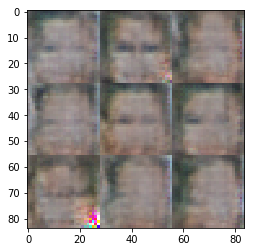

Epoch 0 Discriminator loss: 1.1014 Generator loss: 1.0072
Epoch 0 Discriminator loss: 1.1502 Generator loss: 0.9253
Epoch 0 Discriminator loss: 1.1103 Generator loss: 0.9431
Epoch 0 Discriminator loss: 1.1266 Generator loss: 0.9858
Epoch 0 Discriminator loss: 1.1503 Generator loss: 0.9675
Epoch 0 Discriminator loss: 1.0920 Generator loss: 0.9048
Epoch 0 Discriminator loss: 1.1141 Generator loss: 0.9816
Epoch 0 Discriminator loss: 1.0683 Generator loss: 0.9508
Epoch 0 Discriminator loss: 1.1422 Generator loss: 0.9591
Epoch 0 Discriminator loss: 0.9966 Generator loss: 1.0048


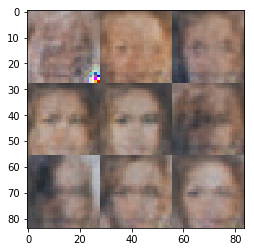

Epoch 0 Discriminator loss: 1.0714 Generator loss: 0.9485
Epoch 0 Discriminator loss: 1.1429 Generator loss: 0.9149
Epoch 0 Discriminator loss: 1.0798 Generator loss: 1.0218
Epoch 0 Discriminator loss: 1.0938 Generator loss: 0.8978
Epoch 0 Discriminator loss: 1.0817 Generator loss: 0.8364
Epoch 0 Discriminator loss: 1.1244 Generator loss: 0.9819
Epoch 0 Discriminator loss: 0.9858 Generator loss: 1.0062
Epoch 0 Discriminator loss: 1.1234 Generator loss: 0.9622
Epoch 0 Discriminator loss: 1.1220 Generator loss: 1.0512
Epoch 0 Discriminator loss: 1.1020 Generator loss: 0.9979


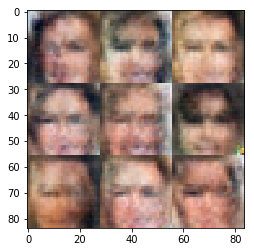

Epoch 0 Discriminator loss: 1.0200 Generator loss: 1.1218
Epoch 0 Discriminator loss: 1.0316 Generator loss: 1.1274
Epoch 0 Discriminator loss: 1.0386 Generator loss: 0.9493
Epoch 0 Discriminator loss: 1.0717 Generator loss: 1.0420
Epoch 0 Discriminator loss: 1.1123 Generator loss: 0.9938
Epoch 0 Discriminator loss: 1.1004 Generator loss: 0.8759
Epoch 0 Discriminator loss: 1.1189 Generator loss: 0.9092
Epoch 0 Discriminator loss: 1.1665 Generator loss: 0.9697
Epoch 0 Discriminator loss: 1.1508 Generator loss: 1.0458
Epoch 0 Discriminator loss: 1.1803 Generator loss: 1.0328


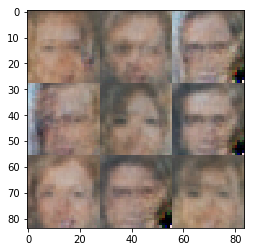

Epoch 0 Discriminator loss: 1.1022 Generator loss: 1.0228
Epoch 0 Discriminator loss: 1.0857 Generator loss: 0.9716
Epoch 0 Discriminator loss: 1.2405 Generator loss: 0.9360
Epoch 0 Discriminator loss: 1.8547 Generator loss: 1.1420
Epoch 0 Discriminator loss: 1.1136 Generator loss: 1.0079
Epoch 0 Discriminator loss: 1.2104 Generator loss: 0.9126
Epoch 0 Discriminator loss: 1.1517 Generator loss: 0.9972
Epoch 0 Discriminator loss: 1.1401 Generator loss: 0.9057
Epoch 0 Discriminator loss: 1.1485 Generator loss: 0.9087
Epoch 0 Discriminator loss: 1.1231 Generator loss: 0.9409


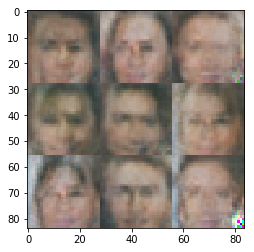

Epoch 0 Discriminator loss: 1.1495 Generator loss: 0.9195
Epoch 0 Discriminator loss: 1.1780 Generator loss: 0.9101
Epoch 0 Discriminator loss: 1.1786 Generator loss: 0.8925
Epoch 0 Discriminator loss: 1.1122 Generator loss: 1.0578
Epoch 0 Discriminator loss: 1.0922 Generator loss: 0.9180
Epoch 0 Discriminator loss: 1.1656 Generator loss: 0.8828
Epoch 0 Discriminator loss: 1.1738 Generator loss: 0.9550
Epoch 0 Discriminator loss: 1.1231 Generator loss: 0.9202
Epoch 0 Discriminator loss: 1.1669 Generator loss: 0.9965
Epoch 0 Discriminator loss: 1.1932 Generator loss: 0.9281


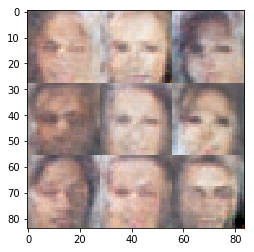

Epoch 0 Discriminator loss: 1.1783 Generator loss: 0.9218
Epoch 0 Discriminator loss: 1.2411 Generator loss: 1.1597
Epoch 0 Discriminator loss: 1.1630 Generator loss: 1.0242
Epoch 0 Discriminator loss: 1.1178 Generator loss: 1.0173
Epoch 0 Discriminator loss: 1.1474 Generator loss: 0.9764
Epoch 0 Discriminator loss: 1.1865 Generator loss: 0.9588
Epoch 0 Discriminator loss: 1.1803 Generator loss: 0.8587
Epoch 0 Discriminator loss: 1.2250 Generator loss: 0.9405
Epoch 0 Discriminator loss: 1.3403 Generator loss: 0.9752
Epoch 0 Discriminator loss: 1.2468 Generator loss: 0.8052


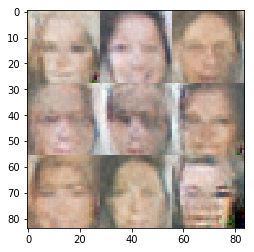

Epoch 0 Discriminator loss: 1.1760 Generator loss: 0.9536
Epoch 0 Discriminator loss: 1.0267 Generator loss: 0.9595
Epoch 0 Discriminator loss: 1.2028 Generator loss: 0.9426
Epoch 0 Discriminator loss: 1.2550 Generator loss: 1.0694
Epoch 0 Discriminator loss: 1.2897 Generator loss: 0.8041
Epoch 0 Discriminator loss: 1.1664 Generator loss: 0.9455
Epoch 0 Discriminator loss: 1.1651 Generator loss: 0.9210
Epoch 0 Discriminator loss: 1.1223 Generator loss: 0.8699
Epoch 0 Discriminator loss: 1.1212 Generator loss: 0.9445
Epoch 0 Discriminator loss: 1.1306 Generator loss: 0.8783


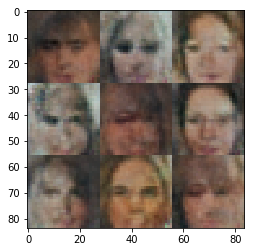

Epoch 0 Discriminator loss: 1.1574 Generator loss: 0.9529
Epoch 0 Discriminator loss: 1.0167 Generator loss: 0.9483
Epoch 0 Discriminator loss: 1.1335 Generator loss: 0.9923
Epoch 0 Discriminator loss: 1.1695 Generator loss: 0.8909
Epoch 0 Discriminator loss: 1.2306 Generator loss: 1.0847
Epoch 0 Discriminator loss: 1.1845 Generator loss: 0.8621
Epoch 0 Discriminator loss: 1.2158 Generator loss: 1.0410
Epoch 0 Discriminator loss: 1.1511 Generator loss: 0.8733
Epoch 0 Discriminator loss: 1.1801 Generator loss: 0.9627
Epoch 0 Discriminator loss: 1.2264 Generator loss: 0.9223


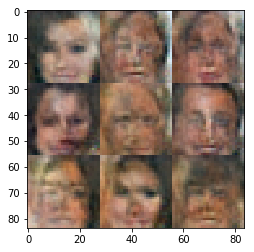

Epoch 0 Discriminator loss: 1.2486 Generator loss: 0.9138
Epoch 0 Discriminator loss: 1.1915 Generator loss: 0.9965
Epoch 0 Discriminator loss: 1.1451 Generator loss: 0.9917
Epoch 0 Discriminator loss: 1.2378 Generator loss: 0.9315
Epoch 0 Discriminator loss: 1.0810 Generator loss: 1.0058
Epoch 0 Discriminator loss: 0.8275 Generator loss: 1.0462
Epoch 0 Discriminator loss: 1.1114 Generator loss: 0.8615
Epoch 0 Discriminator loss: 1.2603 Generator loss: 0.8837
Epoch 0 Discriminator loss: 1.2127 Generator loss: 0.8843
Epoch 0 Discriminator loss: 1.2514 Generator loss: 0.9216


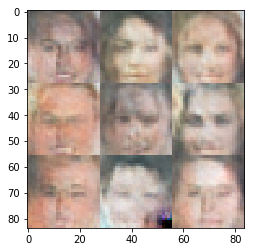

Epoch 0 Discriminator loss: 1.1933 Generator loss: 0.8285
Epoch 0 Discriminator loss: 1.2792 Generator loss: 0.9765
Epoch 0 Discriminator loss: 1.1998 Generator loss: 0.9431
Epoch 0 Discriminator loss: 1.2416 Generator loss: 0.8113
Epoch 0 Discriminator loss: 1.2491 Generator loss: 0.8770
Epoch 0 Discriminator loss: 1.2717 Generator loss: 0.8499
Epoch 0 Discriminator loss: 1.2559 Generator loss: 0.9140
Epoch 0 Discriminator loss: 1.2419 Generator loss: 0.8334
Epoch 0 Discriminator loss: 1.2280 Generator loss: 0.8280
Epoch 0 Discriminator loss: 1.3201 Generator loss: 0.8543


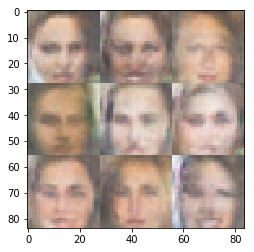

Epoch 0 Discriminator loss: 1.1946 Generator loss: 0.8289
Epoch 0 Discriminator loss: 1.2197 Generator loss: 0.9374
Epoch 0 Discriminator loss: 1.3104 Generator loss: 0.9045
Epoch 0 Discriminator loss: 1.2423 Generator loss: 0.8286
Epoch 0 Discriminator loss: 1.3101 Generator loss: 0.7656
Epoch 0 Discriminator loss: 1.2118 Generator loss: 0.8777
Epoch 0 Discriminator loss: 1.3050 Generator loss: 0.8613
Epoch 0 Discriminator loss: 1.2397 Generator loss: 0.7675
Epoch 0 Discriminator loss: 1.2030 Generator loss: 0.8934
Epoch 0 Discriminator loss: 1.2515 Generator loss: 0.8246


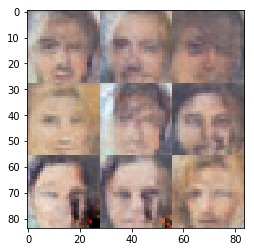

Epoch 0 Discriminator loss: 1.2426 Generator loss: 0.8336
Epoch 0 Discriminator loss: 1.1818 Generator loss: 0.8381
Epoch 0 Discriminator loss: 1.2470 Generator loss: 0.8604
Epoch 0 Discriminator loss: 1.2204 Generator loss: 0.8597
Epoch 0 Discriminator loss: 1.1795 Generator loss: 0.8631
Epoch 0 Discriminator loss: 1.3119 Generator loss: 0.8018
Epoch 0 Discriminator loss: 1.2717 Generator loss: 0.8523
Epoch 0 Discriminator loss: 1.2551 Generator loss: 0.8090
Epoch 0 Discriminator loss: 1.1676 Generator loss: 0.8277
Epoch 0 Discriminator loss: 1.1741 Generator loss: 0.8716


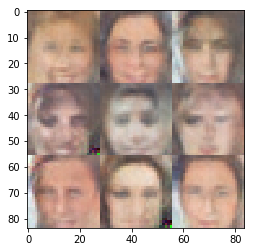

Epoch 0 Discriminator loss: 1.2225 Generator loss: 0.8811


KeyboardInterrupt: 

In [39]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.